In [ ]:
#Red Neuronal Convolucional aplicadas en

import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import os

#Imágenes tomadas de Kaggle (Butterfly Image Classification)
#https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification

# Crear un directorio para almacenar las imágenes
os.makedirs('images', exist_ok=True)

# Se descargaron los archivos de imágenes desde Kaggle.
# Se seleccionaron las primeras 1.772 imágenes del conjunto train, para
# facilitar el procesamiento

Número de imágenes encontradas: 2858


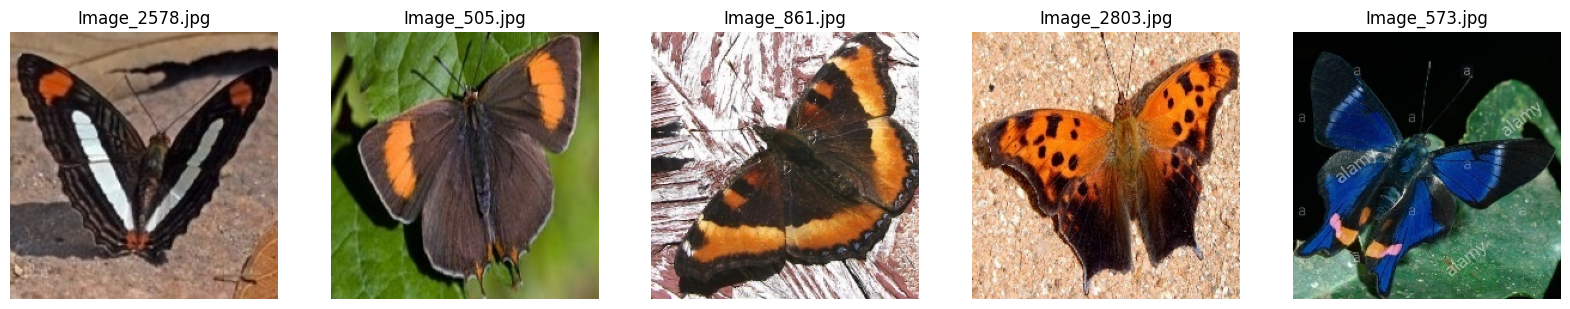

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

# Especificar el directorio que contiene las imágenes
image_dir = 'images'

# Listar los archivos en el directorio
images = os.listdir(image_dir)
print(f'Número de imágenes encontradas: {len(images)}')

# Mostrar algunas imágenes para verificar
fig, axes = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    img_path = os.path.join(image_dir, images[i])
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(images[i])
    axes[i].axis('off')
plt.show()



In [ ]:
import cv2
import os

# Ruta al directorio de imágenes
directory = 'images'

# Lista para almacenar las imágenes
images = []

# Iterar sobre cada archivo en el directorio
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Puedes añadir más formatos de imagen si es necesario
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        if image is not None:
            images.append(image)
            height, width, channels = image.shape
           #print(f"Imagen: {filename}, Ancho: {width}, Altura: {height}")

# Verificar el tamaño de la segunda imagen cargada (índice 1)
if len(images) > 1:
    height, width, channels = images[1].shape
    print(f"Tamaño de la segunda imagen - Ancho: {width}, Altura: {height}, Canales: {channels}")
else:
    print("No hay suficientes imágenes en la lista.")

Tamaño de la segunda imagen - Ancho: 224, Altura: 224, Canales: 3


In [ ]:
import os
import pandas as pd

def extract_images_and_labels(images_path, labels_file, target_classes):
    # Leer el archivo de etiquetas
    labels_df = pd.read_csv(labels_file)

    # Filtrar las etiquetas que pertenecen a las clases objetivo
    filtered_labels_df = labels_df[labels_df['label'].isin(target_classes)]

    # Crear un DataFrame vacío para almacenar las imágenes
    filtered_images_df = pd.DataFrame(columns=['filename'])

    # Crear una lista para almacenar los datos de las imágenes
    images_data = []

    # Filtrar las imágenes encontradas
    for index, row in filtered_labels_df.iterrows():
        source_image_path = os.path.join(images_path, row['filename'])
        if os.path.isfile(source_image_path):
            # Añadir el nombre del archivo a la lista de datos de imágenes
            images_data.append({'filename': row['filename']})

    # Convertir la lista de datos a un DataFrame
    filtered_images_df = pd.DataFrame(images_data)

    # Asegurarse de que las etiquetas filtradas solo incluyan imágenes encontradas
    filtered_labels_df = filtered_labels_df[filtered_labels_df['filename'].isin(filtered_images_df['filename'])]

    # Devolver los DataFrames de imágenes y etiquetas
    return filtered_images_df, filtered_labels_df

# Ruta a tu directorio de imágenes
images_path = 'images'

# Ruta a tu archivo de etiquetas
labels_file = 'Training_set.csv'

# Clases objetivo
target_classes = ["MOURNING CLOAK", "SLEEPY ORANGE", "ATALA", "BROWN SIPROETA", "SCARCE SWALLOW"]

# Llamar a la función y obtener los DataFrames
filtered_images_df, filtered_labels_df = extract_images_and_labels(images_path, labels_file, target_classes)

# Mostrar los primeros registros de los DataFrames
print("DataFrame de Imágenes Filtradas:")
print(filtered_images_df.head())
print(f'Número de imágenes filtradas: {len(filtered_images_df)}')

print("\nDataFrame de Etiquetas Filtradas:")
print(filtered_labels_df.head())
print(f'Número de etiquetas filtradas: {len(filtered_labels_df)}')

DataFrame de Imágenes Filtradas:
       filename
0   Image_3.jpg
1   Image_9.jpg
2  Image_30.jpg
3  Image_53.jpg
4  Image_59.jpg
Número de imágenes filtradas: 252

DataFrame de Etiquetas Filtradas:
        filename           label
2    Image_3.jpg  BROWN SIPROETA
8    Image_9.jpg  BROWN SIPROETA
29  Image_30.jpg           ATALA
52  Image_53.jpg  SCARCE SWALLOW
58  Image_59.jpg  SCARCE SWALLOW
Número de etiquetas filtradas: 252


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd
import numpy as np
import os

# Tamaño de las imágenes (ajustar según sea necesario)
img_size = (64, 64)

# Función para leer y procesar una imagen
def load_and_preprocess_image(image_path, img_size):
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img)
    return img_array

# DataFrames filtrados de imágenes y etiquetas
labels_df = filtered_labels_df
images_df = filtered_images_df # Asegurarse de que esto sea el directorio correcto

# Verificar las primeras filas del DataFrame para asegurarse de que se ha cargado correctamente
print("DataFrame de etiquetas filtradas:")
print(labels_df.head())

# Filtrar solo archivos de imagen que están presentes en el DataFrame
image_files = images_df['filename'].tolist()
labels = labels_df['label'].tolist()

print(f'Número de imágenes encontradas: {len(image_files)}')

# Procesar todas las imágenes en el directorio
image_data = []
for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    if os.path.isfile(img_path):  # Asegúrate de que el archivo existe
        img_array = load_and_preprocess_image(img_path, img_size)
        image_data.append(img_array)

# Convertir la lista de imágenes a un array de NumPy
image_data = np.array(image_data)
labels = np.array(labels)
print(f'Tamaño del array de imágenes: {image_data.shape}')
print(f'Tamaño del array de etiquetas: {labels.shape}')

# Encontrar las clases únicas en las etiquetas
unique_classes = np.unique(labels)

# Contar el número de clases
num_classes = len(unique_classes)

print(f'Número de clases: {num_classes}')
print(f'Clases únicas: {unique_classes}')

# Convertir image_data y labels en un dataset de TensorFlow
image_dataset = tf.data.Dataset.from_tensor_slices((image_data, labels))

# Verificar las dimensiones de los datos
for image, label in image_dataset.take(1):
    print("Dimensiones de una imagen en el dataset:", image.shape)
    print("Etiqueta correspondiente:", label.numpy())

DataFrame de etiquetas filtradas:
        filename           label
2    Image_3.jpg  BROWN SIPROETA
8    Image_9.jpg  BROWN SIPROETA
29  Image_30.jpg           ATALA
52  Image_53.jpg  SCARCE SWALLOW
58  Image_59.jpg  SCARCE SWALLOW
Número de imágenes encontradas: 252
Tamaño del array de imágenes: (252, 64, 64, 3)
Tamaño del array de etiquetas: (252,)
Número de clases: 5
Clases únicas: ['ATALA' 'BROWN SIPROETA' 'MOURNING CLOAK' 'SCARCE SWALLOW'
 'SLEEPY ORANGE']
Dimensiones de una imagen en el dataset: (64, 64, 3)
Etiqueta correspondiente: b'BROWN SIPROETA'


In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict

def count_files_by_class(image_data, labels):
    # Verificar que image_data y labels sean arreglos de Numpy
    if not isinstance(image_data, np.ndarray):
        raise ValueError("`image_data` debe ser un arreglo de Numpy.")
    if not isinstance(labels, np.ndarray):
        raise ValueError("`labels` debe ser un arreglo de Numpy.")

    # Asegurarse de que image_data y labels tengan la misma longitud
    if len(image_data) != len(labels):
        raise ValueError("`image_data` y `labels` deben tener la misma longitud.")

    # Convertir los arreglos en un DataFrame
    combined_df = pd.DataFrame({'filename': np.arange(len(image_data)), 'label': labels})

    # Diccionario para almacenar el conteo de archivos por clase
    file_count = defaultdict(int)

    # Contar archivos por clase
    for label in combined_df['label']:
        file_count[label] += 1

    return file_count


# Contar los archivos por clase
file_counts = count_files_by_class(image_data, labels)

# Convertir el diccionario a una lista de tuplas y ordenar de menor a mayor
sorted_file_counts = sorted(file_counts.items(), key=lambda x: x[1])

# Mostrar el resultado
print("Conteo de archivos por clase (de menor a mayor):")
for class_name, count in sorted_file_counts:
    print(f"Clase {class_name}: {count} archivos")

Conteo de archivos por clase (de menor a mayor):
Clase ATALA: 42 archivos
Clase BROWN SIPROETA: 45 archivos
Clase SCARCE SWALLOW: 46 archivos
Clase SLEEPY ORANGE: 51 archivos
Clase MOURNING CLOAK: 68 archivos


Tipo de datos de img_to_show: float32
Rango de valores de img_to_show: 11.0 - 255.0


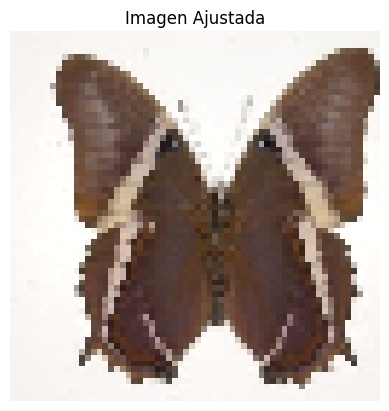

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que img_to_show es la imagen a mostrar
img_to_show = image_data[0]  # Ejemplo: primera imagen en el conjunto de datos

# Verifica el tipo de datos y el rango
print(f"Tipo de datos de img_to_show: {img_to_show.dtype}")
print(f"Rango de valores de img_to_show: {img_to_show.min()} - {img_to_show.max()}")

# Ajusta los valores si es necesario
if img_to_show.max() > 1.0:
    img_to_show = img_to_show / 244.0  # Normaliza a [0, 1]
elif img_to_show.max() <= 1.0:
    img_to_show = img_to_show  # Ya está en el rango adecuado

# Convertir a uint8 para la visualización
img_to_show = np.clip(img_to_show, 0, 1)  # Asegúrate de que los valores estén en [0, 1]
img_to_show = (img_to_show * 255).astype(np.uint8)  # Convertir a uint8

# Si la imagen es en escala de grises, conviértela a RGB
if img_to_show.ndim == 2:  # Escala de grises
    img_to_show = np.stack([img_to_show] * 3, axis=-1)  # Convertir a RGB

# Muestra la imagen
plt.imshow(img_to_show)
plt.title('Imagen Ajustada')
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

images_array = np.array(image_data)

# 1. Normalizar las imágenes (escala de 0 a 1)
images_array = images_array.astype(np.float32) / 255.0

print("Imágenes normalizadas, forma del array:", images_array.shape)

# 2. Convertir etiquetas de texto a valores numéricos
# Asegúrate de que labels_array contiene etiquetas de texto
labels_array = np.array(labels)  # Si ya está como texto, conviértelo a una lista de strings si es necesario

# Crear un LabelEncoder y ajustar a las etiquetas
label_encoder = LabelEncoder()
labels_int = label_encoder.fit_transform(labels_array.flatten())  # Aplanar para ajustar el encoder

# Convertir a array numpy
labels_int = np.array(labels_int)

# Asegúrate de que las dimensiones coincidan con las imágenes
print("Etiquetas como array:", labels_int.shape)

Imágenes normalizadas, forma del array: (252, 64, 64, 3)
Etiquetas como array: (252,)


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba si es necesario
from sklearn.model_selection import train_test_split

# Dividir las imágenes y etiquetas en conjuntos de entrenamiento y prueba
train_images, test_images, train_labels, test_labels = train_test_split(
    images_array, labels_int, test_size=0.3, random_state=42
)

print("Forma de las imágenes de entrenamiento:", train_images.shape)
print("Forma de las etiquetas de entrenamiento:", train_labels.shape)
print("Forma de las imágenes de prueba:", test_images.shape)
print("Forma de las etiquetas de prueba:", test_labels.shape)

Forma de las imágenes de entrenamiento: (176, 64, 64, 3)
Forma de las etiquetas de entrenamiento: (176,)
Forma de las imágenes de prueba: (76, 64, 64, 3)
Forma de las etiquetas de prueba: (76,)


In [ ]:
!pip install scikeras

In [ ]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.17.0 w

In [ ]:
#Construcción del modelo
#Construir el modelo de clasificación
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt
import warnings
from tensorflow.keras.preprocessing.image import ImageDataGenerator
warnings.filterwarnings('ignore')

# Definir un modelo simple como ejemplo
# Definir el modelo con el número correcto de clases
# Definir el modelo
model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.20),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.20),

        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.20),

       # Conv2D(512, (3, 3), activation='relu'),
       # MaxPooling2D((2, 2)),
       # Dropout(0.20),

        Flatten(),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
])

model.summary()

#Tener en cuenta: Hacer 9 transformaciones sobre cada imagen (rotar, invertir color, escalar, difuminar, realzar), con un ciclo for. Cada transformación
#se debe guardar. Al final, el dataset va a tener, por ejemplo, 17.000

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,763,909 (10.54 MB)

 Trainable params: 2,763,909 (10.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.2367 - loss: 1.6981 - val_accuracy: 0.5263 - val_loss: 1.5501
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5439 - loss: 1.3769 - val_accuracy: 0.5658 - val_loss: 1.1936
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 564ms/step - accuracy: 0.6298 - loss: 0.9141 - val_accuracy: 0.7368 - val_loss: 0.7952
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 544ms/step - accuracy: 0.7104 - loss: 0.6511 - val_accuracy: 0.6579 - val_loss: 0.7693
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 760ms/step - accuracy: 0.8219 - loss: 0.4940 - val_accuracy: 0.6447 - val_loss: 0.9722
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 556ms/step - accuracy: 0.7841 - loss: 0.5618 - val_accuracy: 0.8158 - val_loss: 0.6508
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 560ms/step - accuracy: 0.8626 - loss: 0.4000 - val_accuracy: 0.7763 - val_loss: 0.5397
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 884ms/step - accuracy: 0.9327 - loss: 0.2412 - val_accuracy: 0.7500 - val_loss: 0.58

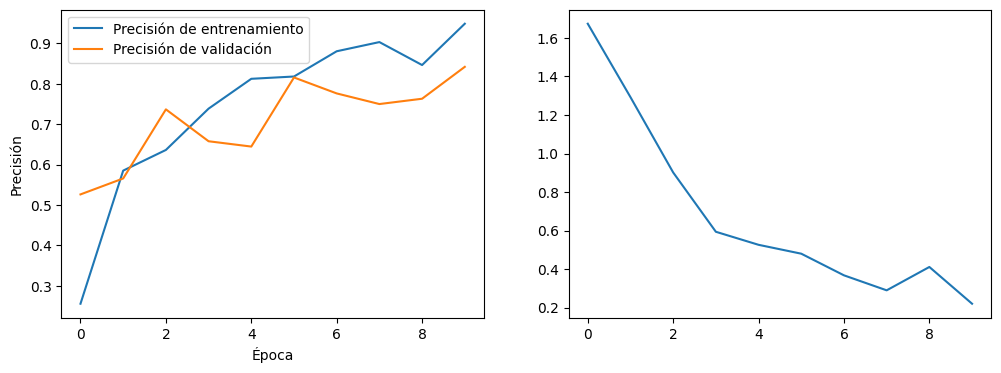

In [ ]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels),
                    batch_size=32)

# Graficar el historial de entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')

In [ ]:
# Dividir las imágenes y etiquetas en conjuntos de entrenamiento y prueba
train_images, test_images, train_labels, test_labels = train_test_split(
    images_array, labels_int, test_size=0.2, random_state=42)

print("Forma de las imágenes de entrenamiento:", train_images.shape)
print("Forma de las etiquetas de entrenamiento:", train_labels.shape)
print("Forma de las imágenes de prueba:", test_images.shape)
print("Forma de las etiquetas de prueba:", test_labels.shape)
print()

#Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(train_images, train_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

#Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

Forma de las imágenes de entrenamiento: (201, 64, 64, 3)
Forma de las etiquetas de entrenamiento: (201,)
Forma de las imágenes de prueba: (51, 64, 64, 3)
Forma de las etiquetas de prueba: (51,)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.9836 - loss: 0.1672
Pérdida en el conjunto de entrenamiento: 0.16590763628482819
Precisión en el conjunto de entrenamiento: 0.9751243591308594
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7390 - loss: 0.8409
Pérdida en el conjunto de prueba: 0.8047171831130981
Precisión en el conjunto de prueba: 0.7647058963775635


Etiquetas como array: (252,)
Forma de las imágenes de entrenamiento: (201, 12288)
Forma de las etiquetas de entrenamiento: (201,)
Forma de las imágenes de prueba: (51, 64, 64, 3)
Forma de las etiquetas de prueba: (51,)

Tamaño de las imágenes de entrenamiento: 201
Tamaño de las etiquetas de entrenamiento: 201
Tamaño de las imágenes de prueba: 51
Tamaño de las etiquetas de prueba: 51
Forma de test_images después de reestructurar: (51, 64, 64, 3)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Tamaño de las etiquetas predichas: 51
Tamaño de las etiquetas test_labels: 51
Tamaño de test_images: 51
Matriz de confusión (sklearn):
[[ 8  1  0  0  0]
 [ 4  9  1  0  0]
 [ 2  3 12  0  0]
 [ 1  0  0  6  0]
 [ 0  0  0  0  4]]
Clases únicas en test_labels: [0 1 2 3 4]
Clases únicas en pred_labels: [0 1 2 3 4]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.53      0.89      0.67         9
           1       0.69      0.64      0.67        14
           2  

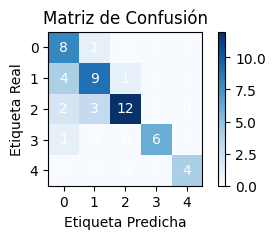


Cálculo utilizando librerias
TP: 9
TN: 8
FP: 1
FN: 4
Precisión (sklearn): 0.7647058823529411
Sensibilidad (sklearn): 0.7647058823529411
Especificidad (sklearn): 0.8888888888888888


In [ ]:
# Matriz de confusión utilizando librerias
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Aplanar las imágenes
num_samples = images_array.shape[0]
flattened_images = images_array.reshape(num_samples, -1)

# 2. Convertir etiquetas de texto a valores numéricos
# Asegúrate de que labels_array contiene etiquetas de texto
labels_array = np.array(labels)  # Si ya está como texto, conviértelo a una lista de strings si es necesario

# Crear un LabelEncoder y ajustar a las etiquetas
label_encoder = LabelEncoder()
labels_int = label_encoder.fit_transform(labels_array.flatten())  # Aplanar para ajustar el encoder

# Convertir a array numpy
labels_int = np.array(labels_int)

# Asegurando que las dimensiones coincidan con las imágenes
print("Etiquetas como array:", labels_int.shape)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_images, test_images, train_labels, test_labels = train_test_split(flattened_images, labels_int, test_size=0.2, random_state=42)

# Restructurando las imágenes aplanadas
if test_images.shape[1] == 64*64*3:
    test_images = test_images.reshape(-1, 64, 64, 3)

# Normaliza las imágenes si es necesario
# test_images = test_images / 255.0


print("Forma de las imágenes de entrenamiento:", train_images.shape)
print("Forma de las etiquetas de entrenamiento:", train_labels.shape)
print("Forma de las imágenes de prueba:", test_images.shape)
print("Forma de las etiquetas de prueba:", test_labels.shape)
print()

print("Tamaño de las imágenes de entrenamiento:", len(train_images))
print("Tamaño de las etiquetas de entrenamiento:", len(train_labels))
print("Tamaño de las imágenes de prueba:", len(test_images))
print("Tamaño de las etiquetas de prueba:", len(test_labels))


print("Forma de test_images después de reestructurar:", test_images.shape)

pred_labels = model.predict(test_images)
pred_labels = np.argmax(pred_labels, axis=1)

print("Tamaño de las etiquetas predichas:", len(pred_labels))
print("Tamaño de las etiquetas test_labels:", len(test_labels))
print("Tamaño de test_images:", len(test_images))

# Asegurarse de que pred_labels y test_labels tienen la misma longitud
assert len(pred_labels) == len(test_labels), "El número de predicciones no coincide con el número de etiquetas reales."


# Obtener matriz de confusión utilizando sklearn
conf_matrix = confusion_matrix(test_labels, pred_labels)

# Imprimir la matriz de confusión para inspección
print("Matriz de confusión (sklearn):")
print(conf_matrix)

# Imprimir las clases únicas presentes en test_labels
print("Clases únicas en test_labels:", np.unique(test_labels))

# Imprimir las clases únicas presentes en pred_labels
print("Clases únicas en pred_labels:", np.unique(pred_labels))

# Calcular métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(test_labels, pred_labels))

# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()
plt.xticks(np.arange(len(np.unique(test_labels))), np.unique(test_labels))
plt.yticks(np.arange(len(np.unique(test_labels))), np.unique(test_labels))
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
for i in range(len(np.unique(test_labels))):
    for j in range(len(np.unique(test_labels))):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="white")
plt.show()

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print()
print("Cálculo utilizando librerias")
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

# Calcular precisión, sensibilidad y especificidad utilizando sklearn
precision_sklearn = precision_score(test_labels, pred_labels, average='micro')
sensibilidad_sklearn = recall_score(test_labels, pred_labels, average='micro')  # Recall es lo mismo que sensibilidad
# Calcular especificidad utilizando sklearn
especificidad_sklearn = TN / (TN + FP) if (TN + FP) > 0 else 0

print("Precisión (sklearn):", precision_sklearn)
print("Sensibilidad (sklearn):", sensibilidad_sklearn)
print("Especificidad (sklearn):", especificidad_sklearn)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


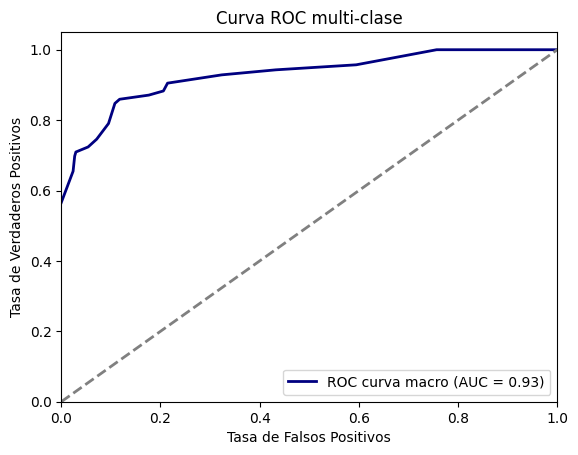

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

# Como los datos están cargados en `images_array` y `labels_int`
# images_array: (1772, 64, 64, 3)
# labels_int: (1772,)

# Hacer predicciones
y_pred = model.predict(test_images)

# Convertir etiquetas verdaderas y predicciones a forma binarizada
test_labels_binarized = label_binarize(test_labels, classes=range(75))

# Calcular la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(75):
    if np.sum(test_labels_binarized[:, i]) > 0:  # Asegurarse de que hay al menos una muestra de cada clase
        fpr[i], tpr[i], _ = roc_curve(test_labels_binarized[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio macro del ROC AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(75) if i in roc_auc]))

# Interpolar todas las curvas ROC a estos puntos
mean_tpr = np.zeros_like(all_fpr)
for i in range(75):
    if i in roc_auc:
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Promediar y calcular el AUC
mean_tpr /= len(roc_auc)
roc_auc["macro"] = auc(all_fpr, mean_tpr)

# Dibujar la curva ROC promedio
plt.figure()
plt.plot(all_fpr, mean_tpr, color='navy', lw=2, label=f'ROC curva macro (AUC = {roc_auc["macro"]:0.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC multi-clase')
plt.legend(loc="lower right")
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


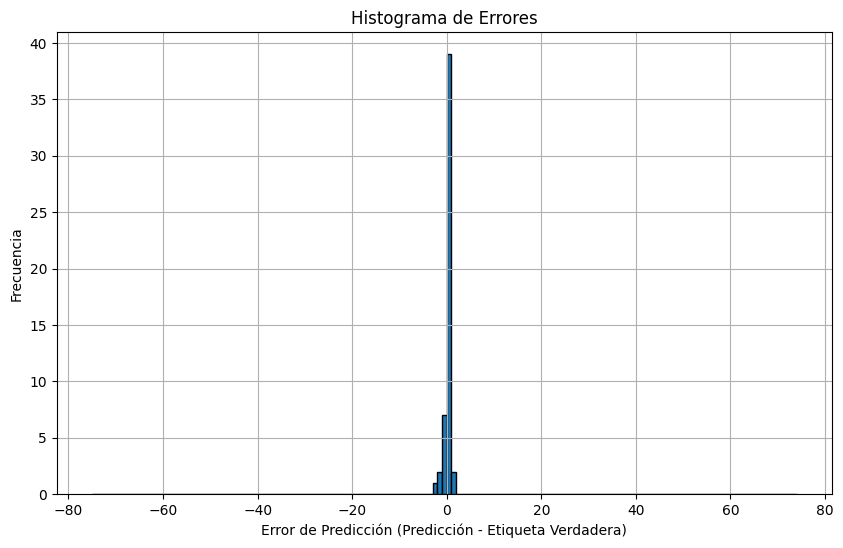

In [ ]:
# Hacer predicciones
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular errores
errors = y_pred_classes - test_labels

# Dibujar el histograma de errores
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=range(-75, 75), edgecolor='black', align='mid')
plt.title('Histograma de Errores')
plt.xlabel('Error de Predicción (Predicción - Etiqueta Verdadera)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#Observaciones y conclusiones

*   Por limitaciones de recursos computacionales no es posible procesar más de 2000 imágenes.
*   Se redujo el número de clases de 75 a 5, para aumentar las imágenes por clase.
*   Incluir código para que seleccione las clases con mayor número de imágenes de manera automática porque ahora se hace de manera manual
*   En las primeras versiones se modificó el modelo para llegar a este que obtuvo mejores resultados en la precisión del conjunto de prueba-
*   Probar incluir Kernel.regularizer u otras opciones para seguir mejorando el modelo.

*   En esta versión, el tamaño de la imagen se redujo a 64 x 64 para mejorar el rendimiento.
*   Con estos cambios la Precisión en el conjunto de prueba es: 0.7647058963775635

* Sobreajuste (Overfitting): El modelo tiene una alta precisión en el conjunto de entrenamiento (97.51%) pero una precisión significativamente más baja en el conjunto de prueba (76,47%). Esto indica que el modelo está sobreajustando los datos de entrenamiento y no está generalizando bien a datos no vistos.
Pérdida: La pérdida mucho más baja en el conjunto de entrenamiento en comparación con el conjunto de prueba también sugiere sobreajuste.
Para mejorar la generalización del modelo, podrías considerar las siguientes estrategias:

* Aumentar los datos de entrenamiento: Si es posible, obtener más datos de entrenamiento puede ayudar a mejorar la generalización.
Regularización: Aplicar técnicas de regularización como Dropout o L2 regularization.
* Aumento de datos (Data Augmentation): Usar técnicas de aumento de datos para generar variaciones de las imágenes de entrenamiento y así aumentar la diversidad del conjunto de datos.
* Simplificar el modelo: Reducir la complejidad del modelo para evitar el sobreajuste.